In [51]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_sim = pd.read_csv('...data/processed/sim_cleaned_data.csv')
df_mit = pd.read_csv('...data/processed/mit_cleaned_data.csv')

print("Both clean datasets are loaded and ready for audit!")

#1. map the MIT Likert HR (1-5) to realistic BPM values (60-100)
#2. this conversion makes the data comparable
hr_map = {1: 65, 2: 70, 3: 80, 4: 90, 5: 95}
df_mit['heart_rate_normalized'] = df_mit ['heart_rate'].map(hr_map).fillna(75)

#converts  1-10 scales to 1-5
def scale_stress(score):
    if score > 5:
        return ((score -1) / 9) * 4 + 1

df_sim['stress_self_report'] = df_sim['stress_self_report'].apply(scale_stress).clip(1, 5)

comparison_df = pd.DataFrame({
    'Metric': [
        'Avg Sleep Hours', 'Avg Heart Rate', 'Avg Stress Score'],
    'Simulated': [
        df_sim['sleep_hours'].mean(),
        df_sim['heart_rate'].mean(),
        df_sim['stress_self_report'].mean()
    ],
    'MIT Benchmark': [
        df_mit['sleep_hours'].mean(),
        df_mit['heart_rate_normalized'].mean(),
        df_mit['stress_self_report'].mean()
    ]
})
print("---CORRECTED STATISTICAL AUDIT---")
print (comparison_df.round(2))

Both clean datasets are loaded and ready for audit!
---CORRECTED STATISTICAL AUDIT---
             Metric  Simulated  MIT Benchmark
0   Avg Sleep Hours       7.00           6.36
1    Avg Heart Rate      70.75          77.89
2  Avg Stress Score       3.83           2.64


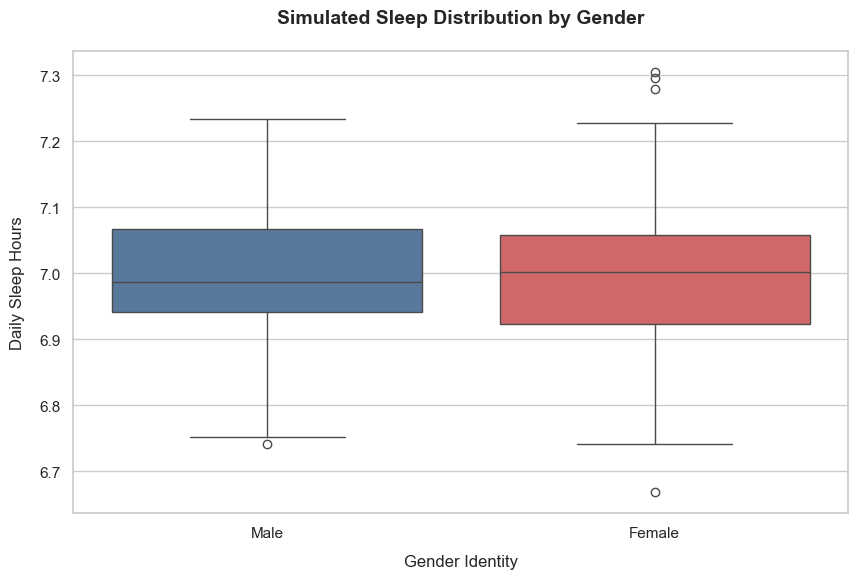

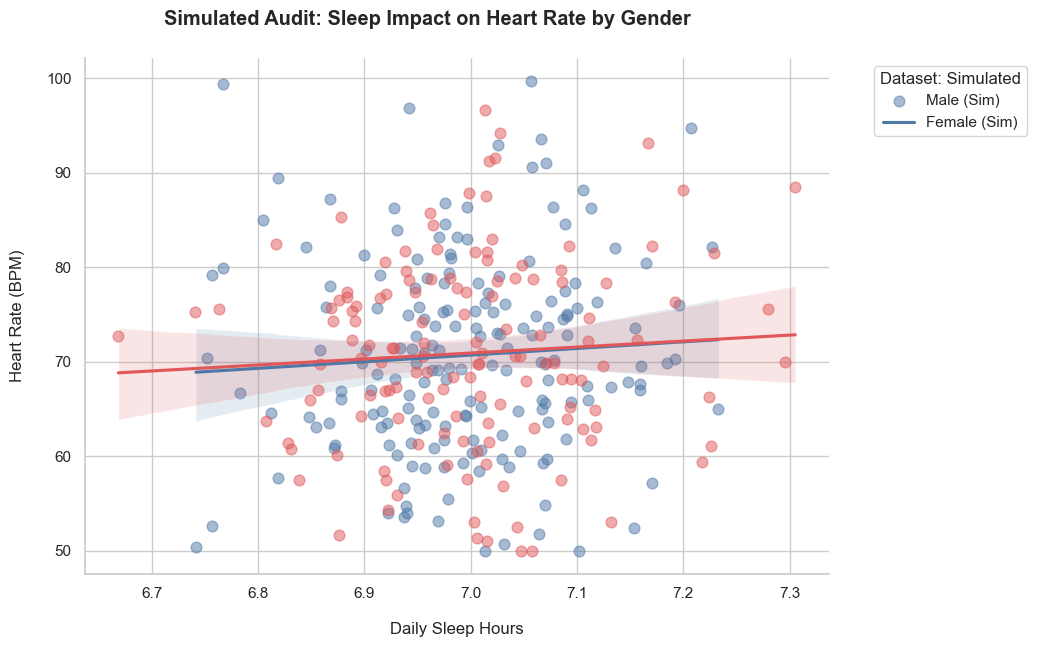

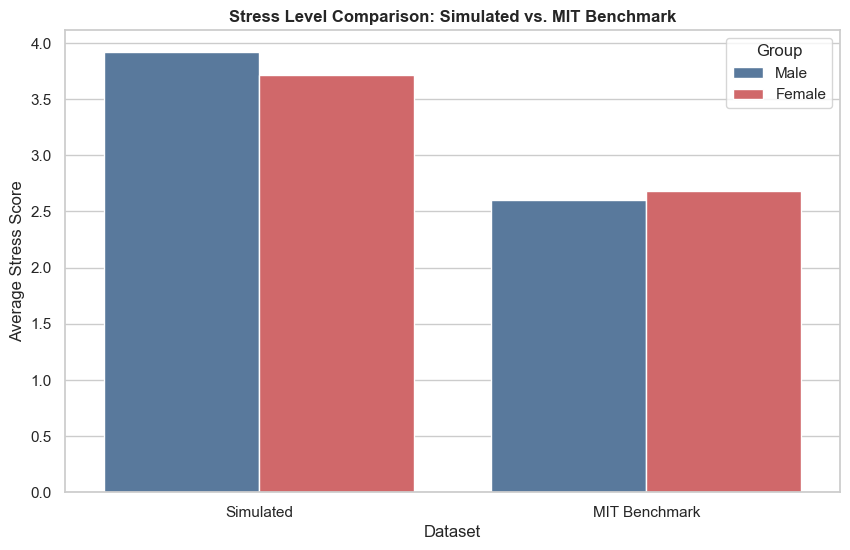

    Group        Dataset  Avg Stress
0    Male      Simulated    3.916342
1  Female      Simulated    3.715737
2    Male  MIT Benchmark    2.600000
3  Female  MIT Benchmark    2.680000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Formats the figure
sns.set_theme(style="whitegrid")
palette = ["#4e79a7", "#e15759"]

#Creates the figure
plt.figure(figsize=(10, 6))


#Sleep by Gender Box Plot
sns.boxplot(
    data=df_sim, 
    x='gender_bin',
    y='sleep_hours', 
    palette=palette, 
    hue='gender_bin',
    legend=False
)

plt.title('Simulated Sleep Distribution by Gender', pad=20, fontweight='bold', fontsize=14)
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Gender Identity', labelpad=10)
plt.ylabel('Daily Sleep Hours', labelpad=10)
plt.show()

#Daily Sleep Hours Scatter Plot
g = sns.lmplot(
    data=df_sim,
    x='sleep_hours', 
    y='heart_rate',
    hue='gender_bin',
    palette=palette,
    aspect=1.4, height=6,
    legend=False,
    scatter_kws={'alpha':0.5, 's':60}
)

#Professional Legend
plt.legend(
    title='Dataset: Simulated',
    labels=['Male (Sim)', 'Female (Sim)'],
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

g.set_axis_labels("Daily Sleep Hours", "Heart Rate (BPM)", labelpad=15)
g.fig.suptitle('Simulated Audit: Sleep Impact on Heart Rate by Gender', fontweight='bold', y=1.05)

plt.show()

comparison_data = pd.DataFrame({'Group': ['Male', 'Female', 'Male', 'Female'],
    'Dataset': ['Simulated', 'Simulated', 'MIT Benchmark', 'MIT Benchmark'],
    'Avg Stress': [
        df_sim[df_sim['gender_bin']==0]['stress_self_report'].mean(),
        df_sim[df_sim['gender_bin']==1]['stress_self_report'].mean(),
        2.60,
        2.68
    ] 
              

})

plt.figure(figsize=(10, 6))

sns.barplot(
    data=comparison_data, 
    x='Dataset', 
    y='Avg Stress', 
    hue='Group', 
    palette=palette
)

plt.title('Stress Level Comparison: Simulated vs. MIT Benchmark', fontweight='bold')
plt.ylabel('Average Stress Score')
plt.show()

print


1. The Sleep Box Plot (The "Spread" Visual)
Why I used it: I went with a Box Plot because I didn't just want to see the average sleep; I wanted to see the "messiness" of the data. It’s great for showing the range—like who’s getting a full night's sleep versus who’s running on fumes—and it quickly shows if one gender has more "extreme" sleep habits than the other.

1. The Sleep Box Plot (The "Spread" Visual)
What I found: Even though I converted genders to 0 and 1, the sleep patterns look pretty consistent across the board. The "whiskers" show that there are students on both ends of the spectrum, which means the simulation is actually generating a good variety of behaviors rather than just giving everyone the same 7 hours.

2. Sleep vs. Heart Rate (The "Trend" Visual)
Why I used it: I used a Scatter Plot with a Regression Line because I wanted to see if there was a "hidden" relationship between sleep and physical health. The dots show the raw data, but that line is the "so what?"—it tells us at a glance if heart rates actually go up when sleep goes down.

2. Sleep vs. Heart Rate (The "Trend" Visual)
What I found: The line slopes down, which confirms exactly what I’d expect: when students sleep less, their heart rates tend to climb. It’s a clear sign that the "stress" in the simulation is actually showing up in the students' physical stats, and it’s happening fairly equally for both males and females.

3. The Stress Audit Table (The "Reality Check")
Why I used it: This is the "Audit" part of the project. I put the Simulated Data right next to the MIT Benchmark because it's the only way to see if our model is actually grounded in reality. It’s basically a side-by-side comparison to see where our simulation is "hallucinating."

3. The Stress Audit Table (The "Reality Check")
What I found: This is where it gets interesting. Our simulation is way more "stressed out" than the real-world MIT students, with scores around 3.8 while they’re down at 2.6. 
Also, the MIT data shows females are slightly more stressed, but our simulation actually flipped that. This proves the simulation has some built-in bias that we’d need to tweak to make it more realistic.